In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'/home/beans/bespoke')

from constants import *
from imports import *
from train_utils import *
from loaders import TrnLoader
from viz_utils import *
from rollout import *
from utils import *

In [2]:
%%time
BS = 8 # 64
seqlen = 24 #80
loader = TrnLoader(bs=BS, n_batches=20, seqlen=seqlen, bptt=2, n_workers=2) # 600

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(


waiting for chunk
waiting for chunk
CPU times: user 328 ms, sys: 3.63 s, total: 3.96 s
Wall time: 11.9 s


Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/beans/miniconda3/envs/py38/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/beans/bespoke/loaders.py", line 188, in keep_chunk_filled
    time.sleep(0.1)
  File "/home/beans/bespoke/loaders.py", line 188, in keep_chunk_filled
    time.sleep(0.1)
KeyboardInterrupt
KeyboardInterrupt


In [3]:
%%time
# Rollout using only cnn
m = EffNet().to(device)
stem = "9.5_e1"
sd = torch.load(f"{BESPOKE_ROOT}/models/m{stem}.torch")
m.load_state_dict(sd, strict=False)
m.use_rnn = False
rollout = Rollout(loader, stem, m=m, store_imgs=True)

resetting hidden carousel
resetting hidden carousel
Done w batches
Done cat targets
Done cat preds
Stopsign approaching! 60.38
Stopsign approaching! 60.3
Stopsign approaching! 59.84
Stopsign approaching! 58.89
Stopsign approaching! 57.38
Stopsign approaching! 57.1
Stopsign approaching! 53.89
Stopsign approaching! 50.45
Stopsign approaching! 46.9
Stopsign approaching! 43.31
Stopsign approaching! 39.82
Stopsign approaching! 36.36
Stopsign approaching! 32.93
Stopsign approaching! 59.82
Stopsign approaching! 59.42
Stopsign approaching! 58.47
Stopsign approaching! 57.16
Stopsign approaching! 55.3
Stopsign approaching! 53.19
Stopsign approaching! 50.89
Stopsign approaching! 48.39
Stopsign approaching! 45.88
Stopsign approaching! 43.23
Stopsign approaching! 40.67
Stopsign approaching! 38.04
Stopsign approaching! 35.39
Stopsign approaching! 32.68
Stopsign approaching! 29.98
Stopsign approaching! 27.19
Stopsign approaching! 55.07
Stopsign approaching! 50.23
Stopsign approaching! 45.57
Stopsign 

In [4]:
%%time
#rollout = Rollout(loader, "4.13_e33", store_imgs=True)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


In [7]:
make_enriched_vid_trn(rollout)

0
sim_9.5_e1 done!


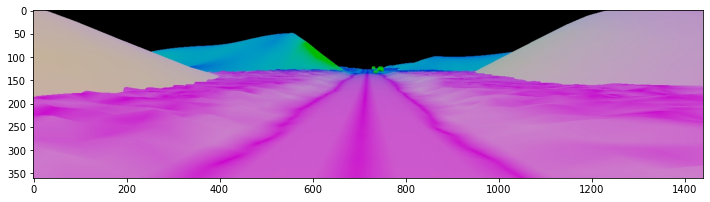

In [8]:
plt.figure(figsize=(12,8))
plt.imshow(rollout.perspective[0, :,:,3:])

In [26]:
get_m_sz(m.backbone.blocks[:7])

16.0

In [5]:
#skipify(rollout, skip=20)

In [6]:
rollout.img.shape

(960, 360, 1440, 4)

In [7]:
%%time
rollout_f = f"{BESPOKE_ROOT}/tmp/trn_{rollout.model_stem}_rollout.pkl"

save_object(rollout, rollout_f)

CPU times: user 6.91 s, sys: 1.74 s, total: 8.66 s
Wall time: 10.7 s


In [7]:
rollout.img.shape

(1920, 360, 1440, 4)